In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

datathon  env  trainset.csv  trainset_full.csv	Untitled.ipynb


In [3]:
df = pd.read_csv('trainset.csv')

In [4]:
df2 = pd.read_csv('trainset_full.csv')

In [5]:
df2.shape

(1367190, 17)

In [6]:
df.shape

(1367190, 17)

In [48]:
df.assign(
    time=lambda x: pd.to_datetime(x.measured_at).view('int'), 
    ts_diff=lambda x: x.time.diff()
).query('ts_diff > 6e11').head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category,time,ts_diff
15043,15043,11,2020-04-14 11:40:00+00:00,0.366667,-0.00215,314.6,282.4,0.000000,0.000000,10.0,24.0,36.0,0.90,89.7,146.9,1,ERROR=3,1586864400000000000,2.400000e+12
15154,15154,11,2020-04-15 07:10:00+00:00,0.625000,-0.00350,249.0,281.3,0.000000,0.012897,7.0,22.0,40.0,0.94,86.0,189.4,1,ERROR=3,1586934600000000000,4.200000e+12
20525,20525,11,2020-05-23 08:50:00+00:00,0.450000,0.12715,267.9,268.9,0.704698,0.589286,18.0,29.0,39.0,0.85,-1.9,189.5,1,NO_ERROR,1590223800000000000,6.720000e+13
21480,21480,11,2020-05-30 00:10:00+00:00,0.666667,0.42465,19.1,16.9,0.986577,0.826389,NaN,28.0,54.0,0.98,NaN,189.8,1,NO_ERROR,1590797400000000000,1.200000e+12
22252,22252,11,2020-06-04 10:20:00+00:00,0.425000,0.10760,121.9,118.5,0.697987,0.587302,23.0,33.0,43.0,0.80,-1.6,190.4,1,NO_ERROR,1591266000000000000,6.000000e+12


In [55]:
df.assign(
    time=lambda x: pd.to_datetime(x.measured_at).view('int')
).groupby('turbine_id').time.diff().loc[lambda x: x > 6e11]

15043      2.400000e+12
15154      4.200000e+12
20525      6.720000e+13
21480      1.200000e+12
22252      6.000000e+12
               ...     
1355923    1.200000e+12
1356028    1.200000e+12
1356044    1.080000e+13
1363661    1.200000e+12
1363739    1.200000e+12
Name: time, Length: 1326, dtype: float64

<AxesSubplot:>

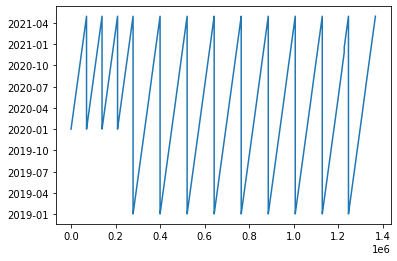

In [50]:
pd.to_datetime(df.measured_at).plot()

In [81]:
df2.error_category.value_counts()

NO_ERROR    1272609
ERROR=12      47724
ERROR=17      21651
ERROR=3       10224
ERROR=5        4893
ERROR=19       3743
ERROR=24       1771
ERROR=28       1494
ERROR=8        1081
ERROR=20        787
ERROR=31        495
ERROR=30        409
ERROR=22        141
ERROR=25        108
ERROR=7          32
ERROR=27         22
ERROR=29          4
ERROR=23          2
Name: error_category, dtype: int64

In [24]:
df.park_id.value_counts()

2    1088578
1     278612
Name: park_id, dtype: int64

In [38]:
df.error_category.value_counts()

NO_ERROR    1272609
ERROR=12      47724
ERROR=17      21651
ERROR=3       10224
ERROR=5        4893
ERROR=19       3743
ERROR=24       1771
ERROR=28       1494
ERROR=8        1081
ERROR=20        787
ERROR=31        495
ERROR=30        409
ERROR=22        141
ERROR=25        108
ERROR=7          32
ERROR=27         22
ERROR=29          4
ERROR=23          2
Name: error_category, dtype: int64

In [25]:
df.turbine_id.value_counts()

24    121509
23    121508
22    121495
25    121493
27    121454
21    121308
26    121146
29    120979
28    117686
13     69703
14     69691
11     69613
12     69605
Name: turbine_id, dtype: int64

In [23]:
df.columns

Index(['index', 'turbine_id', 'measured_at', 'wind_speed', 'power',
       'nacelle_direction', 'wind_direction', 'rotor_speed', 'generator_speed',
       'temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing', 'cosphi',
       'blade_angle_avg', 'hydraulic_pressure', 'park_id', 'error_category'],
      dtype='object')

<AxesSubplot:xlabel='time'>

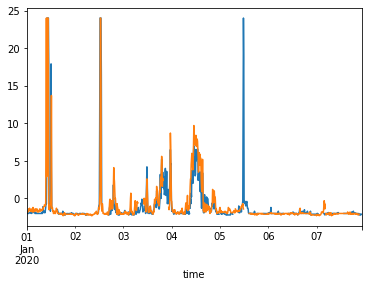

In [56]:
df.query('turbine_id == 11').assign(
    time=lambda x: pd.to_datetime(x.measured_at)
).set_index('time').blade_angle_avg.head(1000).plot()
df.query('turbine_id == 12').assign(
    time=lambda x: pd.to_datetime(x.measured_at)
).set_index('time').blade_angle_avg.head(1000).plot()

In [77]:
# df.pipe(lambda x: pd.to_datetime(x.measured_at)) == pd.to_datetime(df.measured_at)

In [75]:
df.assign(
    null_count=lambda x: x.isnull().sum(axis=1)
).query('null_count > 2').head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category,null_count
90,90,11,2020-01-01 15:00:00+00:00,0.333333,NaN,211.9,215.1,0.590604,0.495536,NaN,21.0,48.0,0.44,NaN,189.6,1,NO_ERROR,3
351,351,11,2020-01-03 10:30:00+00:00,0.841667,NaN,219.2,216.5,0.993289,NaN,7.0,21.0,NaN,0.99,-1.0,190.7,1,NO_ERROR,3
770,770,11,2020-01-06 08:20:00+00:00,0.583333,0.29325,233.6,237.5,0.892617,NaN,5.0,18.0,NaN,0.96,NaN,189.8,1,NO_ERROR,3
771,771,11,2020-01-06 08:30:00+00:00,0.550000,0.25015,233.6,235.5,0.845638,NaN,5.0,18.0,NaN,0.95,NaN,189.2,1,NO_ERROR,3
772,772,11,2020-01-06 08:40:00+00:00,0.558333,0.25110,233.6,233.3,0.859060,NaN,5.0,18.0,NaN,0.95,NaN,190.8,1,NO_ERROR,3


In [65]:
df.groupby('park_id').turbine_id.value_counts()

park_id  turbine_id
1        13             69703
         14             69691
         11             69613
         12             69605
2        24            121509
         23            121508
         22            121495
         25            121493
         27            121454
         21            121308
         26            121146
         29            120979
         28            117686
Name: turbine_id, dtype: int64

In [62]:
df.turbine_id.value_counts()

24    121509
23    121508
22    121495
25    121493
27    121454
21    121308
26    121146
29    120979
28    117686
13     69703
14     69691
11     69613
12     69605
Name: turbine_id, dtype: int64

In [31]:
df.query('error_category == "ERROR=3"').head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
14152,14152,11,2020-04-08 06:40:00+00:00,0.558333,0.23935,93.4,93.7,0.859060,0.720238,10.0,25.0,43.0,0.95,-2.0,189.4,1,ERROR=3
14153,14153,11,2020-04-08 06:50:00+00:00,0.525000,0.21690,93.4,95.9,0.805369,0.678075,10.0,25.0,43.0,0.94,-2.0,189.6,1,ERROR=3
14154,14154,11,2020-04-08 07:00:00+00:00,0.500000,0.19265,93.4,101.6,0.771812,0.647321,11.0,25.0,43.0,0.93,-2.0,189.1,1,ERROR=3
14155,14155,11,2020-04-08 07:10:00+00:00,0.450000,0.13820,93.4,102.3,0.744966,0.623512,11.0,25.0,43.0,0.88,-1.6,190.1,1,ERROR=3
14156,14156,11,2020-04-08 07:20:00+00:00,0.416667,0.09385,97.7,101.6,0.677852,0.570437,12.0,25.0,43.0,0.79,-1.3,190.7,1,ERROR=3


In [26]:
df.dropna().shape

(803320, 17)

In [46]:
features = df.loc[:, 'wind_speed':'hydraulic_pressure'].columns.tolist()

In [35]:
df.query('park_id == 1').groupby([
    'measured_at', 'turbine_id'
]).first().loc[:, 'wind_speed':'hydraulic_pressure'].unstack().isna().sum(axis=1, level=0).apply(pd.value_counts, axis=0)

/tmp/ipykernel_2148900/1179766190.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df.query('park_id == 1').groupby([


,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure
0,50759,58324,69527.0,69527.0,52253,52486,55983.0,56256,56400,69527.0,38762,69527.0
1,16701,10571,111.0,111.0,15502,15229,12609.0,12301,12109,111.0,24605,111.0
2,2165,793,76.0,76.0,1892,1895,1089.0,1115,1156,76.0,5721,76.0
3,103,43,19.0,19.0,84,119,52.0,54,65,19.0,632,19.0
4,5,2,NaN,NaN,2,4,NaN,7,3,NaN,13,NaN


In [10]:
df.query('measured_at == "2020-01-01 00:10:00+00:00"')

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.138750,266.6,267.0,0.704698,0.591766,5.0,20.0,33.0,0.88,NaN,189.5,1,NO_ERROR
69614,69614,12,2020-01-01 00:10:00+00:00,0.416667,NaN,274.0,275.9,0.664430,0.558036,5.0,23.0,33.0,0.80,NaN,189.8,1,NO_ERROR
139219,139219,13,2020-01-01 00:10:00+00:00,0.550000,0.230400,265.8,268.3,0.838926,0.703373,5.0,20.0,33.0,0.95,-2.0,188.9,1,NO_ERROR
208922,208922,14,2020-01-01 00:10:00+00:00,0.466667,0.182800,264.7,266.7,0.718121,0.603671,5.0,21.0,31.0,0.92,-1.9,189.8,1,NO_ERROR
331067,331067,21,2020-01-01 00:10:00+00:00,0.469231,0.104364,197.1,198.7,0.425000,0.383733,9.0,40.0,59.0,0.10,34.1,247.3,2,ERROR=12
452435,452435,22,2020-01-01 00:10:00+00:00,0.476923,0.122091,197.8,200.5,NaN,0.482267,9.0,41.0,60.0,0.30,21.3,246.8,2,ERROR=12
573958,573958,23,2020-01-01 00:10:00+00:00,0.469231,0.199061,193.9,194.8,0.750000,0.675800,9.0,43.0,65.0,1.00,-2.8,246.6,2,NO_ERROR
695465,695465,24,2020-01-01 00:10:00+00:00,0.469231,0.196394,198.2,195.9,0.750000,0.678200,9.0,38.0,68.0,1.00,-2.8,247.3,2,NO_ERROR
816959,816959,25,2020-01-01 00:10:00+00:00,0.438462,0.173424,196.2,196.0,0.700000,0.634067,9.0,42.0,62.0,1.00,NaN,247.2,2,NO_ERROR
938450,938450,26,2020-01-01 00:10:00+00:00,0.407692,0.131212,191.7,193.2,0.650000,0.583533,9.0,43.0,63.0,1.00,-2.8,247.2,2,NO_ERROR


In [14]:
df.query('park_id == 2').eval('no_err = error_category == "NO_ERROR" ').no_err.mean()

0.9219780300538868

In [9]:
df.head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,11,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5.0,20.0,32.0,0.85,-1.9,189.2,1,NO_ERROR
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5.0,20.0,33.0,0.88,NaN,189.5,1,NO_ERROR
2,2,11,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5.0,20.0,34.0,0.92,-2.0,190.1,1,NO_ERROR
3,3,11,2020-01-01 00:30:00+00:00,0.525000,0.21810,272.1,272.7,0.805369,0.676091,5.0,20.0,38.0,0.94,-2.0,190.0,1,NO_ERROR
4,4,11,2020-01-01 00:40:00+00:00,0.541667,0.23430,279.5,281.1,0.832215,0.700397,5.0,20.0,41.0,0.95,-2.0,189.9,1,NO_ERROR


In [1]:
df.error_category.value_counts()

NameError: name 'df' is not defined

In [36]:
df.head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,11,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5.0,20.0,32.0,0.85,-1.9,189.2,1,NO_ERROR
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5.0,20.0,33.0,0.88,NaN,189.5,1,NO_ERROR
2,2,11,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5.0,20.0,34.0,0.92,-2.0,190.1,1,NO_ERROR
3,3,11,2020-01-01 00:30:00+00:00,0.525000,0.21810,272.1,272.7,0.805369,0.676091,5.0,20.0,38.0,0.94,-2.0,190.0,1,NO_ERROR
4,4,11,2020-01-01 00:40:00+00:00,0.541667,0.23430,279.5,281.1,0.832215,0.700397,5.0,20.0,41.0,0.95,-2.0,189.9,1,NO_ERROR


In [13]:
df2.head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,11,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5,20,32,0.85,-1.9,189.2,1,NO_ERROR
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5,20,33,0.88,-2.0,189.5,1,NO_ERROR
2,2,11,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5,20,34,0.92,-2.0,190.1,1,NO_ERROR
3,3,11,2020-01-01 00:30:00+00:00,0.525000,0.21810,272.1,272.7,0.805369,0.676091,5,20,38,0.94,-2.0,190.0,1,NO_ERROR
4,4,11,2020-01-01 00:40:00+00:00,0.541667,0.23430,279.5,281.1,0.832215,0.700397,5,20,41,0.95,-2.0,189.9,1,NO_ERROR


In [5]:
na_mask = df.isna()

In [6]:
features = df.loc[:, 'wind_speed':'hydraulic_pressure'].columns.tolist()

In [24]:
def evaluate(df_pred,  df_true, df_train=df):
#     print((df_train.isna()[features].sum() + 1))
    return (
        (df_pred[features]  - df_true[features])#/df_true[features]
    ).abs().sum(axis=0) / (df_train.isna()[features].sum() + 1)

In [43]:
evaluate(df.ffill(), df2).loc[lambda x: x > 0].index.to_list()

['wind_speed',
 'power',
 'rotor_speed',
 'generator_speed',
 'temp_environment',
 'temp_hydraulic_oil',
 'temp_gear_bearing',
 'blade_angle_avg']

In [31]:
(df[features].ffill() - df2[features]).query('blade_angle_avg > 5').head()

,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure
3255,-0.033333,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.5,0.0
4100,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0
4103,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,0.0
4105,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,0.0
4107,0.000000,0.00885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


In [112]:
df.iloc[3230:].head(30)#.interpolate(method='linear')#.plot()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
3230,3230,11,2020-01-23 10:20:00+00:00,NaN,-0.00420,241.6,240.0,0.127517,0.110615,NaN,20.0,33.0,0.82,24.0,188.5,1,NO_ERROR
3231,3231,11,2020-01-23 10:30:00+00:00,NaN,-0.00420,230.3,241.8,0.120805,0.102679,5.0,20.0,33.0,0.82,24.0,188.8,1,NO_ERROR
3232,3232,11,2020-01-23 10:40:00+00:00,NaN,-0.00365,238.3,239.1,0.127517,0.107143,5.0,20.0,33.0,0.81,24.0,190.1,1,NO_ERROR
3233,3233,11,2020-01-23 10:50:00+00:00,NaN,-0.00350,236.0,233.8,0.114094,0.099702,5.0,20.0,33.0,0.82,24.0,189.7,1,NO_ERROR
3234,3234,11,2020-01-23 11:00:00+00:00,NaN,-0.00305,229.4,238.8,0.114094,0.097718,5.0,20.0,32.0,0.79,NaN,188.8,1,NO_ERROR
3235,3235,11,2020-01-23 11:10:00+00:00,NaN,-0.00350,229.4,223.6,0.073826,0.090774,5.0,20.0,32.0,0.81,24.0,188.3,1,NO_ERROR
3236,3236,11,2020-01-23 11:20:00+00:00,NaN,-0.00405,223.6,205.1,0.087248,0.099206,5.0,20.0,32.0,0.78,24.0,190.2,1,NO_ERROR
3237,3237,11,2020-01-23 11:30:00+00:00,NaN,0.00765,224.7,221.7,0.355705,0.303075,5.0,20.0,31.0,0.25,12.4,190.5,1,NO_ERROR
3238,3238,11,2020-01-23 11:40:00+00:00,NaN,0.01275,220.3,220.4,0.583893,0.488591,5.0,20.0,31.0,0.26,-0.7,190.6,1,NO_ERROR
3239,3239,11,2020-01-23 11:50:00+00:00,NaN,-0.00335,218.0,223.3,0.040268,0.079861,5.0,20.0,31.0,0.76,24.1,192.1,1,NO_ERROR


In [17]:
from sklearn.metrics import r2_score

In [18]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

def evaluate_impute(df_true: pd.DataFrame, df_pred: pd.DataFrame, df_with_missing: pd.DataFrame) -> float:
    columns = [  # 8 columns with missing values
     'wind_speed',
     'power',
     'rotor_speed',
     'generator_speed',
     'temp_environment',
     'temp_hydraulic_oil',
     'temp_gear_bearing',
     'blade_angle_avg'
    ]
    scores = []
    for column in columns:
        missing_mask = df_with_missing[column].isna()
        score = r2_score(y_true=df_true[column][missing_mask],
                         y_pred=df_pred[column][missing_mask])
        scores.append(score)
    return pd.Series(scores, index=columns)


In [105]:
evaluate_impute(df2, df.ffill(), df)

wind_speed            0.722944
power                 0.739428
rotor_speed           0.538760
generator_speed       0.572485
temp_environment      0.970677
temp_hydraulic_oil    0.979288
temp_gear_bearing     0.890659
blade_angle_avg       0.246498
dtype: float64

In [43]:
evaluate_impute(df2, df.interpolate('linear'), df)

wind_speed            0.865132
power                 0.862060
rotor_speed           0.764595
generator_speed       0.772247
temp_environment      0.993837
temp_hydraulic_oil    0.992977
temp_gear_bearing     0.957519
blade_angle_avg       0.583762
dtype: float64

## Need to look at some examples

In [38]:
def get_mad(df_true,  df_pred, df_with_missing):
#     print((df_train.isna()[features].sum() + 1))
    columns = [  # 8 columns with missing values
     'wind_speed',
     'power',
     'rotor_speed',
     'generator_speed',
     'temp_environment',
     'temp_hydraulic_oil',
     'temp_gear_bearing',
     'blade_angle_avg'
    ]
    return (
        (df_pred[columns]  - df_true[columns])#/df_true[features]
    ).abs()

In [87]:
# get_mad(df2, df.interpolate('linear'), df).query('generator_speed > .4').sample()
get_mad(df2, df.interpolate('linear'), df).query('blade_angle_avg > 5 and index > 1149475').sample()

,wind_speed,power,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,blade_angle_avg
1171888,0.081448,0.0,0.0,0.0,0.0,0.0,0.0,10.652941


<AxesSubplot:xlabel='time'>

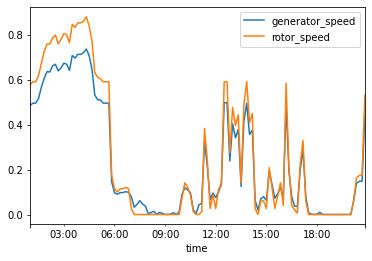

In [49]:
df2.iloc[myindex- 70:].head(120).assign(time=lambda x: pd.to_datetime(x.measured_at)).set_index('time')[[myfeature, 'rotor_speed']].plot()


In [47]:
features = df.loc[:, 'wind_speed':'hydraulic_pressure'].columns.tolist()

[<AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>,
 <AxesSubplot:xlabel='time'>]

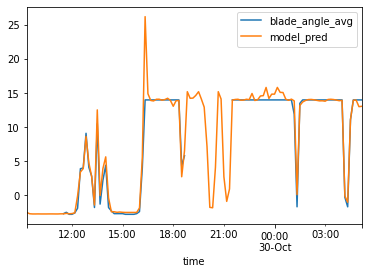

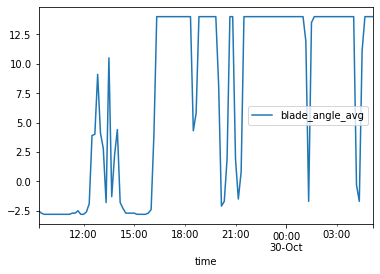

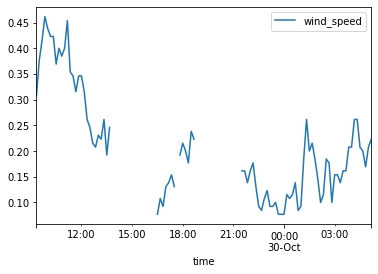

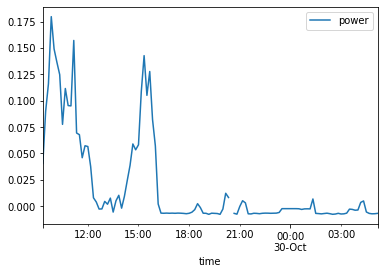

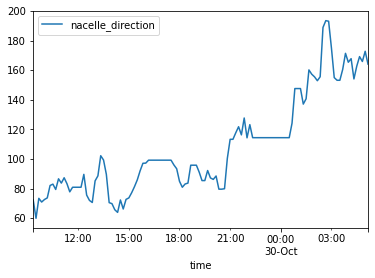

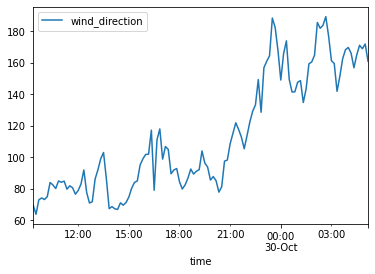

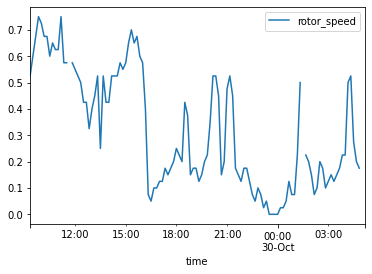

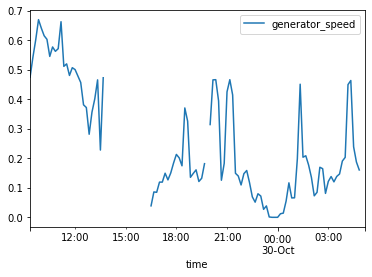

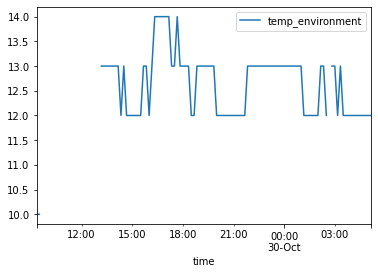

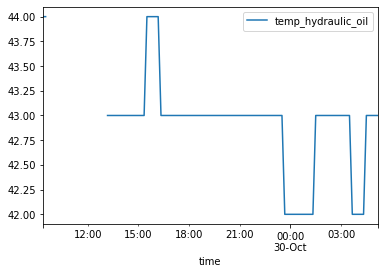

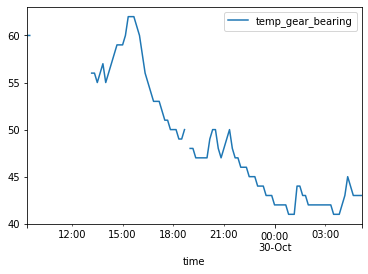

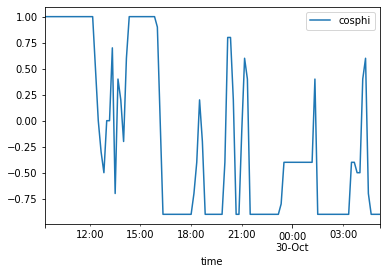

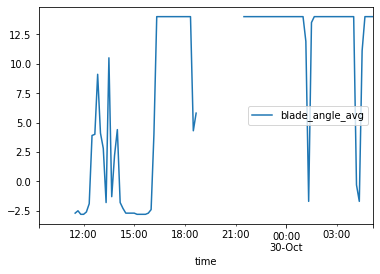

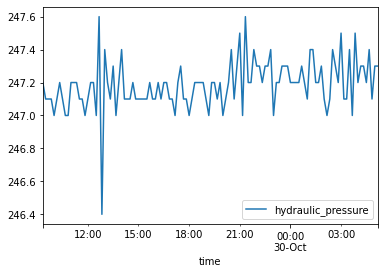

In [89]:
myindex = 1171888
features
myfeature = 'blade_angle_avg'
# myfeature = 'generator_speed'
df.assign(
    model_pred=lambda x: mymodel.predict(x[get_X_y_predict_single(x, df2, myfeature)[0].columns.tolist()])
).iloc[myindex - 70:].head(120).assign(time=lambda x: pd.to_datetime(x.measured_at)).set_index('time')[[myfeature, 'model_pred']].plot()
# df.iloc[myindex- 70:].head(120).assign(time=lambda x: pd.to_datetime(x.measured_at)).set_index('time')[[myfeature]].plot()
df2.iloc[myindex- 70:].head(120).assign(time=lambda x: pd.to_datetime(x.measured_at)).set_index('time')[[myfeature]].plot()
# df.iloc[1300:].head(120).assign(time=lambda x: pd.to_datetime(x.measured_at)).set_index('time')[['rotor_speed', 'cosphi']].plot()
[
    df.iloc[myindex- 70:].head(120).assign(time=lambda x: pd.to_datetime(x.measured_at)).set_index('time')[[feature]].plot()
    for feature in features if feature is not myfeature
]


<AxesSubplot:xlabel='time'>

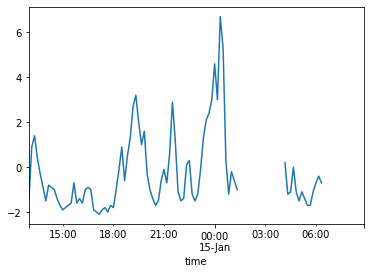

In [136]:
df.iloc[1950:].head(120).assign(time=lambda x: pd.to_datetime(x.measured_at)).set_index('time').blade_angle_avg.plot()

In [120]:
evaluate_impute(df2, df.interpolate('linear'), df)

wind_speed            0.865132
power                 0.862060
rotor_speed           0.764595
generator_speed       0.772247
temp_environment      0.993837
temp_hydraulic_oil    0.992977
temp_gear_bearing     0.957519
blade_angle_avg       0.583762
dtype: float64

In [114]:
def my_simple_average_imputer(df: pd.DataFrame) -> pd.DataFrame:
    df = df.interpolate(method='linear')
    assert df.isna().sum().sum() == 0
    return df

In [106]:
df.error_category.value_counts()

NO_ERROR    1272609
ERROR=12      47724
ERROR=17      21651
ERROR=3       10224
ERROR=5        4893
ERROR=19       3743
ERROR=24       1771
ERROR=28       1494
ERROR=8        1081
ERROR=20        787
ERROR=31        495
ERROR=30        409
ERROR=22        141
ERROR=25        108
ERROR=7          32
ERROR=27         22
ERROR=29          4
ERROR=23          2
Name: error_category, dtype: int64

In [ ]:
evaluate_impute()

In [115]:
my_simple_average_imputer(df2).shape

(1367190, 17)

## Cross validate 

In [7]:
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression

In [10]:
from lightgbm import LGBMClassifier, LGBMRegressor

In [11]:
def get_X_y(df, features=None, target=None):
    if features is not None:
        X = df[features]
    else:
        X = df.drop(columns=['index', 'measured_at', 'error_category'])
        
    if target is not None:
        y = df[target]
    else:
        y = df['error_category']
    
    return X, y

def get_X_y_predict_single(df, df_full, target, features=None):
    if features is not None:
        X = df[features]
    else:
        X = df.drop(columns=['index', 'measured_at', 'error_category'])
    missing_mask = df[target].isna()
#     X = X[missing_mask].drop(columns=[target])
#     y = df_full[missing_mask][target]
    X = X.drop(columns=[target])
    y = df_full[target]
    return X, y

In [12]:
df.head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,11,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5.0,20.0,32.0,0.85,-1.9,189.2,1,NO_ERROR
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5.0,20.0,33.0,0.88,NaN,189.5,1,NO_ERROR
2,2,11,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5.0,20.0,34.0,0.92,-2.0,190.1,1,NO_ERROR
3,3,11,2020-01-01 00:30:00+00:00,0.525000,0.21810,272.1,272.7,0.805369,0.676091,5.0,20.0,38.0,0.94,-2.0,190.0,1,NO_ERROR
4,4,11,2020-01-01 00:40:00+00:00,0.541667,0.23430,279.5,281.1,0.832215,0.700397,5.0,20.0,41.0,0.95,-2.0,189.9,1,NO_ERROR


In [32]:
mymodel = None
def mycount(est, X, y):
    global mymodel
    mymodel = est
    return len(X)

In [70]:
my_missing_feature = 'blade_angle_avg'
my_missing_indices = df[df[my_missing_feature].isna()].index
pd.DataFrame(cross_validate(
    LGBMRegressor(n_jobs=1, n_estimators=100),
    *get_X_y_predict_single(df.query('park_id == 2'), df2.query('park_id == 2'), my_missing_feature),
    scoring={
        "r2": make_scorer(r2_score),
        "r2_custom": lambda est, X, y: make_scorer(r2_score)(est, X[X.index.isin(my_missing_indices)], y[X.index.isin(my_missing_indices)]),
#         "count": lambda est, X, y: len(X),
        "count": mycount,
        "count2": lambda est, X, y: len(X[X.index.isin(my_missing_indices)])
    },
    cv=KFold(4), n_jobs=1
))

,fit_time,score_time,test_r2,test_r2_custom,test_count,test_count2
0,4.866505,1.278841,0.985823,0.984147,272145,36505
1,4.972992,1.243109,0.973544,0.967254,272145,37601
2,5.181183,1.277081,0.975602,0.979038,272144,37637
3,5.061288,1.240350,0.976118,0.977638,272144,38071


## Imputation pipeline

In [36]:
# fit 4 classifiers for the features ...
# impute with forwardfill on others
from sklearn.base import clone
from sklearn.model_selection import GroupKFold
#                fill_features=['temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing'],
#                fill_method='linear',

def fit_impute(df_true: pd.DataFrame, df_with_missing: pd.DataFrame, base_model: LGBMClassifier,
               model_features=['blade_angle_avg', 'generator_speed', 'rotor_speed', 'power', 'wind_speed'],
               features=None
              ) -> list:
    # Train models
    models = []
    print(df_true.shape, df_with_missing.shape)
    for feature in model_features:
        model = clone(base_model)
        X_train, y_train = get_X_y_predict_single(df_with_missing, df_true, target=feature)
        model.fit(X_train, y_train)
        models.append(model)
    return models

def predict_impute(df_with_missing: pd.DataFrame, models: list[LGBMRegressor],
                   model_features=['blade_angle_avg', 'generator_speed', 'rotor_speed', 'power', 'wind_speed'],
                   fill_features=['temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing'],
                   fill_method='linear',
                  ) -> pd.DataFrame:
    assert len(model_features) == len(models)
    df_out = df_with_missing.copy()
    for feature, model in zip(model_features, models):
        missing_mask = df_with_missing[feature].isna()
        X_test = df_with_missing[missing_mask][model.feature_name_]
        y_pred = model.predict(X_test)
        df_out.loc[missing_mask, feature] = y_pred
    
    # Interpolate
    df_out.loc[:, fill_features] = df_out.loc[:, fill_features].interpolate(method=fill_method)
    if df_out.isna().sum().sum() > 0:
        still_missing = df_out.isna().sum().loc[lambda x: x > 0]
        print("There are still missing after ffill: ", still_missing)
        for feature in still_missing.index:
            print(feature)
            missing_mask = df_out[feature].isna()
#             print(df_out.loc[missing_mask, feature])
#             print(df_out.loc[missing_mask].groupby(['measured_at', 'park_id'])[feature].transform('mean'))
            times = df_out[missing_mask]['measured_at']
            df_out.loc[missing_mask, feature] = df_out[df_out.measured_at.isin(times)].groupby(['measured_at', 'park_id'])[feature].transform('mean')
    return df_out

def impute_cv(df_true: pd.DataFrame, df_with_missing: pd.DataFrame, base_model: LGBMRegressor, fold=4):
    assert df_true.shape == df_with_missing.shape
    assert (df_true.index == df_with_missing.index).all()
    cv = KFold(fold)
    scores = []
    for train_index, test_index in cv.split(df_with_missing):
        df_train, df_test = df_with_missing.loc[train_index], df_with_missing.loc[test_index]
        y_train, y_test = df_true.loc[train_index], df_true.loc[test_index]
        models = fit_impute(y_train, df_train, base_model=base_model)
        y_pred = predict_impute(df_test, models)
        try:
            score = evaluate_impute(y_test, y_pred, df_with_missing=df_test)
        except ValueError:
            return y_pred
        
        scores.append(score)
    return scores

In [34]:
# df.groupby(['measured_at', 'park_id'])['blade_angle_avg'].transform('mean').head()

In [44]:
# mytestdf = impute_cv(df2.query('park_id == 1'), df.query('park_id == 1'), LGBMRegressor(n_estimators=100, n_jobs=1))
mytestdf2 = impute_cv(df2, df, LGBMRegressor(n_estimators=100, n_jobs=1))

(1025392, 17) (1025392, 17)
(1025392, 17) (1025392, 17)
(1025393, 17) (1025393, 17)
(1025393, 17) (1025393, 17)


In [45]:
pd.concat(mytestdf, axis=1).pipe(print)

                           0         1         2         3
wind_speed          0.981341  0.957062  0.978267  0.972789
power               0.992976  0.994626  0.990477  0.948086
rotor_speed         0.999184  0.999443  0.999249  0.998039
generator_speed     0.998306  0.999362  0.999161  0.998306
temp_environment    0.995212  0.995114  0.995084  0.993901
temp_hydraulic_oil  0.992103  0.988946  0.992067  0.993120
temp_gear_bearing   0.934415  0.926965  0.940744  0.919705
blade_angle_avg     0.957420  0.940112  0.914312  0.935435


In [26]:
mytestdf.query('measured_at == "2020-01-01 06:40:00+00:00"').groupby(['measured_at', 'park_id']).transform('mean').head()

/tmp/ipykernel_2410509/1430295191.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  mytestdf.query('measured_at == "2020-01-01 06:40:00+00:00"').groupby(['measured_at', 'park_id']).transform('mean').head()


,index,turbine_id,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure
69653,104455.5,12.5,0.504167,0.21735,287.55,288.1,0.788591,0.661706,4.0,19.0,36.0,0.895,-1.85,189.75
139258,104455.5,12.5,0.504167,0.21735,287.55,288.1,0.788591,0.661706,4.0,19.0,36.0,0.895,-1.85,189.75


In [23]:
mytestdf.head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
69653,69653,12,2020-01-01 06:40:00+00:00,0.400000,0.11010,294.5,295.1,0.644295,0.541667,NaN,NaN,NaN,0.82,-1.7,190.0,1,NO_ERROR
69654,69654,12,2020-01-01 06:50:00+00:00,0.383333,0.09720,294.5,294.0,0.617450,0.520337,NaN,NaN,NaN,0.79,-1.7,190.0,1,NO_ERROR
69655,69655,12,2020-01-01 07:00:00+00:00,0.375000,0.07885,294.5,293.2,0.617450,0.520833,NaN,NaN,NaN,0.72,-1.5,190.2,1,NO_ERROR
69656,69656,12,2020-01-01 07:10:00+00:00,0.366667,0.06720,294.4,291.6,0.610738,0.510417,NaN,NaN,NaN,0.66,-1.5,190.2,1,NO_ERROR
69657,69657,12,2020-01-01 07:20:00+00:00,0.383333,0.07965,286.6,284.3,0.624161,0.524306,NaN,NaN,NaN,0.72,-1.6,190.8,1,NO_ERROR


In [192]:
df.groupby('turbine_id').head(1).isna().sum()

index                 0
turbine_id            0
measured_at           0
wind_speed            2
power                 0
nacelle_direction     0
wind_direction        0
rotor_speed           2
generator_speed       0
temp_environment      0
temp_hydraulic_oil    0
temp_gear_bearing     2
cosphi                0
blade_angle_avg       1
hydraulic_pressure    0
park_id               0
error_category        0
dtype: int64

In [190]:
mytestdf.head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
69653,69653,12,2020-01-01 06:40:00+00:00,0.400000,0.11010,294.5,295.1,0.644295,0.541667,NaN,NaN,NaN,0.82,-1.7,190.0,1,NO_ERROR
69654,69654,12,2020-01-01 06:50:00+00:00,0.383333,0.09720,294.5,294.0,0.617450,0.520337,NaN,NaN,NaN,0.79,-1.7,190.0,1,NO_ERROR
69655,69655,12,2020-01-01 07:00:00+00:00,0.375000,0.07885,294.5,293.2,0.617450,0.520833,NaN,NaN,NaN,0.72,-1.5,190.2,1,NO_ERROR
69656,69656,12,2020-01-01 07:10:00+00:00,0.366667,0.06720,294.4,291.6,0.610738,0.510417,NaN,NaN,NaN,0.66,-1.5,190.2,1,NO_ERROR
69657,69657,12,2020-01-01 07:20:00+00:00,0.383333,0.07965,286.6,284.3,0.624161,0.524306,NaN,NaN,NaN,0.72,-1.6,190.8,1,NO_ERROR


In [189]:
mytestdf.loc[:, ['temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing']].interpolate('ffill').isna().sum()

temp_environment      8
temp_hydraulic_oil    8
temp_gear_bearing     8
dtype: int64

In [ ]:
df.interpolate()

In [152]:
df.loc[df['blade_angle_avg'].isna(), 'blade_angle_avg':].head()

,blade_angle_avg,hydraulic_pressure,park_id,error_category
1,NaN,189.5,1,NO_ERROR
75,NaN,190.0,1,NO_ERROR
76,NaN,190.4,1,NO_ERROR
77,NaN,189.1,1,NO_ERROR
78,NaN,190.0,1,NO_ERROR


In [150]:
mymodel.feature_name_

['turbine_id',
 'wind_speed',
 'power',
 'nacelle_direction',
 'wind_direction',
 'rotor_speed',
 'generator_speed',
 'temp_environment',
 'temp_hydraulic_oil',
 'temp_gear_bearing',
 'cosphi',
 'hydraulic_pressure',
 'park_id']

In [ ]:
wind_speed            0.865132
power                 0.862060
rotor_speed           0.764595
generator_speed       0.772247
temp_environment      0.993837
temp_hydraulic_oil    0.992977
temp_gear_bearing     0.957519
blade_angle_avg       0.583762

In [73]:
df.query('turbine_id == 29').tail()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
1367185,1367185,29,2021-04-30 22:10:00+00:00,0.253846,0.004242,64.9,65.9,0.525,0.468333,12.0,42.0,53.0,0.6,-1.7,247.2,2,NO_ERROR
1367186,1367186,29,2021-04-30 22:20:00+00:00,0.261538,0.007152,64.9,68.5,0.525,0.466733,11.0,42.0,53.0,0.9,-1.8,246.8,2,NO_ERROR
1367187,1367187,29,2021-04-30 22:30:00+00:00,0.261538,0.007970,64.9,65.2,0.525,0.466733,11.0,43.0,54.0,0.9,-1.7,247.0,2,NO_ERROR
1367188,1367188,29,2021-04-30 22:40:00+00:00,0.307692,0.030394,64.9,62.1,0.525,0.468933,11.0,43.0,55.0,1.0,-2.5,246.9,2,NO_ERROR
1367189,1367189,29,2021-04-30 22:50:00+00:00,0.361538,0.055182,64.9,63.3,0.575,0.516467,11.0,43.0,56.0,1.0,-2.8,246.9,2,NO_ERROR


In [75]:
df.groupby('turbine_id')['index'].agg(['min', 'max'])

,min,max
turbine_id,,
11,0,69612
12,69613,139217
13,139218,208920
14,208921,278611
21,278612,399919
22,399920,521414
23,521415,642922
24,642923,764431
25,764432,885924


### cross val error_cat

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn_hierarchical_classification.classifier import HierarchicalClassifier
from sklearn_hierarchical_classification.constants import ROOT

In [50]:
def my_f1_score(y_true, y_pred, label=0):
    return f1_score(y_true, y_pred, average=None, labels=[label])[0]

In [51]:
features = df.loc[:, 'wind_speed':'hydraulic_pressure'].columns.tolist()

In [56]:
small_samples = ['ERROR=23','ERROR=29','ERROR=27','ERROR=7']

In [62]:
myhier = HierarchicalClassifier(
    base_estimator=LGBMClassifier(n_jobs=1, n_estimators=10),
    class_hierarchy={
        ROOT: ["error"],
        "error": ["NO_ERROR", "some_error"],
        "some_error": ["many_samples", "few_samples"],
        "few_samples": small_samples,
        "many_samples": [c for c in df.error_category.unique() if c not in small_samples and c != "NO_ERROR"]
    }
)

In [63]:
myhier

HierarchicalClassifier(base_estimator=LGBMClassifier(n_estimators=10, n_jobs=1),
                       class_hierarchy={'<ROOT>': ['error'],
                                        'error': ['NO_ERROR', 'some_error'],
                                        'few_samples': ['ERROR=23', 'ERROR=29',
                                                        'ERROR=27', 'ERROR=7'],
                                        'many_samples': ['ERROR=5', 'ERROR=22',
                                                         'ERROR=3', 'ERROR=24',
                                                         'ERROR=19', 'ERROR=8',
                                                         'ERROR=20', 'ERROR=28',
                                                         'ERROR=31', 'ERROR=12',
                                                         'ERROR=30', 'ERROR=17',
                                                         'ERROR=25'],
                                        'some_error': ['many_samples',
                                                       'few_samples']})

In [ ]:
pd.DataFrame(cross_validate(
#     LGBMClassifier(n_jobs=1, n_estimators=15, sample_weight='balanced'),
    
#     RandomForestClassifier(n_estimators=30),
#     DecisionTreeClassifier(max_depth=5),
#     Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())]),
#     *get_X_y(df2.query('error_category != "NO_ERROR" and error_category not in @small_samples'), features=[
#         f for f in features if f not in ['nacelle_direction','generator_speed','power']
#     ]),
    myhier,
    *get_X_y(df2),
    scoring={
        "f1_macro": make_scorer(f1_score, average='macro'),
        "f1_weighted": make_scorer(f1_score, average='weighted'),
        **{
            f"f1_{err}": make_scorer(my_f1_score, label=err)
            for err in df.error_category.unique()
        }
    },
    cv=2, n_jobs=1
))

In [59]:
df.error_category.nunique()

18

In [147]:
# Park 1
_144.iloc[:, 4:].mean(axis=0).rename('f1_score_cv').to_frame().assign(
    error_category=lambda x: x.index.str.replace('test_f1_', '')
).set_index('error_category').join(df.query('park_id == 1').error_category.value_counts().rename('count')).dropna().pipe(print)

                f1_score_cv     count
error_category                       
NO_ERROR           0.000000  268964.0
ERROR=5            0.994516    4650.0
ERROR=22           0.838066      70.0
ERROR=7            0.968627      32.0
ERROR=3            0.825211    2331.0
ERROR=24           0.659274     248.0
ERROR=19           0.534841     701.0
ERROR=8            0.848769    1081.0
ERROR=20           0.925981     517.0
ERROR=28           0.166667       8.0
ERROR=31           0.000000       2.0
ERROR=27           0.000000       2.0
ERROR=23           0.000000       2.0
ERROR=29           0.125000       4.0


In [148]:
# Park 2
_125.iloc[:, 4:].mean(axis=0).rename('f1_score_cv').to_frame().assign(
    error_category=lambda x: x.index.str.replace('test_f1_', '')
).set_index('error_category').join(df.query('park_id == 2').error_category.value_counts().rename('count')).dropna().pipe(print)

                f1_score_cv      count
error_category                        
NO_ERROR           0.000000  1003645.0
ERROR=5            0.158877      243.0
ERROR=22           0.407790       71.0
ERROR=3            0.645142     7893.0
ERROR=24           0.818707     1523.0
ERROR=19           0.483751     3042.0
ERROR=20           0.023810      270.0
ERROR=28           0.555398     1486.0
ERROR=31           0.390498      493.0
ERROR=27           0.071429       20.0
ERROR=12           0.922347    47724.0
ERROR=30           0.324516      409.0
ERROR=17           0.881103    21651.0
ERROR=25           0.758786      108.0


In [121]:
f1_score(pd.Series(['a', 'b', 'c']), pd.Series(['a', 'b', 'c']), average=None, labels=['c'])

array([1.])

In [163]:
pd.DataFrame(cross_validate(
    LGBMClassifier(n_jobs=1, n_estimators=10),
    *get_X_y(df.eval('is_err = error_category == "NO_ERROR"').query('error_category != "NO_ERROR" and park_id == 2'), features=features),
    scoring={
        "f1_macro": make_scorer(f1_score, average='macro'),
        "f1_weighted": make_scorer(f1_score, average='weighted'),
    },
    cv=4, n_jobs=4
))

,fit_time,score_time,test_f1_macro,test_f1_weighted
0,1.663205,0.705982,0.414655,0.799621
1,1.647448,0.721163,0.411912,0.768272
2,1.655723,0.705739,0.438112,0.795937
3,1.657425,0.695267,0.353091,0.795572


In [98]:
from sklearn.dummy import DummyClassifier

In [105]:
pd.DataFrame(cross_validate(
    LGBMClassifier(n_jobs=1, n_estimators=10),
#     DummyClassifier(),
    *get_X_y(df.assign(
        is_err=lambda x: x.error_category == "NO_ERROR",
    ).query(
#         'error_category != "NO_ERROR" and park_id == 2'
        'park_id == 1'
    ), target='is_err'),
    scoring={
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "f1_macro": make_scorer(f1_score, average='macro'),
        "f1_weighted": make_scorer(f1_score, average='weighted'),
    },
    cv=4, n_jobs=4
))

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_macro,test_f1_weighted
0,1.665252,0.334275,1.0,1.0,1.0,1.0,1.0
1,1.610858,0.322581,1.0,1.0,1.0,1.0,1.0
2,1.631732,0.339851,1.0,1.0,1.0,1.0,1.0
3,1.617697,0.323021,1.0,1.0,1.0,1.0,1.0


## 

In [ ]:
def plot

In [57]:
features

['wind_speed',
 'power',
 'nacelle_direction',
 'wind_direction',
 'rotor_speed',
 'generator_speed',
 'temp_environment',
 'temp_hydraulic_oil',
 'temp_gear_bearing',
 'cosphi',
 'blade_angle_avg',
 'hydraulic_pressure']

In [60]:
X_train = df[df['blade_angle_avg'].isna()][features]
y_train = df2[df['blade_angle_avg'].isna()]['blade_angle_avg']#..head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5,20,33,0.88,-2.0,189.5,1,NO_ERROR
75,75,11,2020-01-01 12:30:00+00:00,0.350000,0.04620,236.6,234.2,0.597315,0.500000,7,21,50,0.51,-1.5,190.0,1,NO_ERROR
76,76,11,2020-01-01 12:40:00+00:00,0.333333,0.03885,223.5,222.5,0.590604,0.496528,7,21,52,0.45,-1.3,190.4,1,NO_ERROR
77,77,11,2020-01-01 12:50:00+00:00,0.341667,0.04335,222.7,223.6,0.590604,0.497520,6,21,52,0.50,-1.4,189.1,1,NO_ERROR
78,78,11,2020-01-01 13:00:00+00:00,0.375000,0.06885,225.2,228.5,0.604027,0.504960,6,21,53,0.68,-1.8,190.0,1,NO_ERROR


In [61]:
df[df['blade_angle_avg'].isna()].shape#..head()

(187489, 17)

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
df2

In [52]:
evaluate_impute(df2, df.ffill(), df)

wind_speed            0.722944
power                 0.739428
rotor_speed           0.538760
generator_speed       0.572485
temp_environment      0.970677
temp_hydraulic_oil    0.979288
temp_gear_bearing     0.890659
blade_angle_avg       0.246498
dtype: float64

In [30]:
evaluate(df.groupby('turbine_id').ffill(), df2)

wind_speed            0.079023
power                 0.082481
nacelle_direction     0.000000
wind_direction        0.000000
rotor_speed           0.121474
generator_speed       0.106290
temp_environment      0.699209
temp_hydraulic_oil    0.461032
temp_gear_bearing     2.469239
cosphi                0.000000
blade_angle_avg       5.343380
hydraulic_pressure    0.000000
dtype: float64

In [25]:
evaluate(df.ffill().head(), df2.head(), df.head())

wind_speed            0.00
power                 0.00
nacelle_direction     0.00
wind_direction        0.00
rotor_speed           0.00
generator_speed       0.00
temp_environment      0.00
temp_hydraulic_oil    0.00
temp_gear_bearing     0.00
cosphi                0.00
blade_angle_avg       0.05
hydraulic_pressure    0.00
dtype: float64

In [27]:
df[features].mean()

wind_speed              0.466386
power                   0.238469
nacelle_direction     188.750023
wind_direction        188.240071
rotor_speed             0.657376
generator_speed         0.583623
temp_environment       14.191951
temp_hydraulic_oil     39.693428
temp_gear_bearing      58.033392
cosphi                  0.676993
blade_angle_avg         4.628796
hydraulic_pressure    234.933780
dtype: float64

In [18]:
(df2.loc[:, 'wind_speed':'hydraulic_pressure'] - df2.loc[:, 'wind_speed':'hydraulic_pressure']).head().sum()

wind_speed            0.0
power                 0.0
nacelle_direction     0.0
wind_direction        0.0
rotor_speed           0.0
generator_speed       0.0
temp_environment      0.0
temp_hydraulic_oil    0.0
temp_gear_bearing     0.0
cosphi                0.0
blade_angle_avg       0.0
hydraulic_pressure    0.0
dtype: float64

In [11]:
df.ffill().head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,11,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5.0,20.0,32.0,0.85,-1.9,189.2,1,NO_ERROR
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5.0,20.0,33.0,0.88,-1.9,189.5,1,NO_ERROR
2,2,11,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5.0,20.0,34.0,0.92,-2.0,190.1,1,NO_ERROR
3,3,11,2020-01-01 00:30:00+00:00,0.525000,0.21810,272.1,272.7,0.805369,0.676091,5.0,20.0,38.0,0.94,-2.0,190.0,1,NO_ERROR
4,4,11,2020-01-01 00:40:00+00:00,0.541667,0.23430,279.5,281.1,0.832215,0.700397,5.0,20.0,41.0,0.95,-2.0,189.9,1,NO_ERROR


In [40]:
evaluate(df.groupby('turbine_id')ffill(), df2)

wind_speed           0.211003
power                     inf
nacelle_direction    0.000000
wind_direction       0.000000
rotor_speed               inf
dtype: float64

In [29]:
df.groupby('turbine_id').ffill()

,index,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5.0,20.0,32.0,0.85,-1.9,189.2,1,NO_ERROR
1,1,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5.0,20.0,33.0,0.88,-1.9,189.5,1,NO_ERROR
2,2,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5.0,20.0,34.0,0.92,-2.0,190.1,1,NO_ERROR
3,3,2020-01-01 00:30:00+00:00,0.525000,0.21810,272.1,272.7,0.805369,0.676091,5.0,20.0,38.0,0.94,-2.0,190.0,1,NO_ERROR
4,4,2020-01-01 00:40:00+00:00,0.541667,0.23430,279.5,281.1,0.832215,0.700397,5.0,20.0,41.0,0.95,-2.0,189.9,1,NO_ERROR


In [31]:
na_mask.sum()

index                      0
turbine_id                 0
measured_at                0
wind_speed            101176
power                  58136
nacelle_direction          0
wind_direction             0
rotor_speed            96922
generator_speed        98536
temp_environment       71404
temp_hydraulic_oil     71558
temp_gear_bearing      70575
cosphi                     0
blade_angle_avg       187489
hydraulic_pressure         0
park_id                    0
error_category             0
dtype: int64

In [15]:
evaluate(df.ffill(), df2)

65.8724557695824

In [46]:
df2 * na_mask

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-0.0,0.0,0,
1,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-2.0,0.0,0,
2,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-0.0,0.0,0,
3,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-0.0,0.0,0,
4,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-0.0,0.0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367185,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-0.0,0.0,0,
1367186,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-0.0,0.0,0,
1367187,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-0.0,0.0,0,
1367188,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,-0.0,0.0,0,


In [44]:
df[na_mask].shape

(1367190, 17)

In [40]:
df2.head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,11,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5,20,32,0.85,-1.9,189.2,1,NO_ERROR
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5,20,33,0.88,-2.0,189.5,1,NO_ERROR
2,2,11,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5,20,34,0.92,-2.0,190.1,1,NO_ERROR
3,3,11,2020-01-01 00:30:00+00:00,0.525000,0.21810,272.1,272.7,0.805369,0.676091,5,20,38,0.94,-2.0,190.0,1,NO_ERROR
4,4,11,2020-01-01 00:40:00+00:00,0.541667,0.23430,279.5,281.1,0.832215,0.700397,5,20,41,0.95,-2.0,189.9,1,NO_ERROR
